<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-13 16:10:43--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  45.7MB/s    in 4.3s    

2025-07-13 16:10:48 (46.5 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


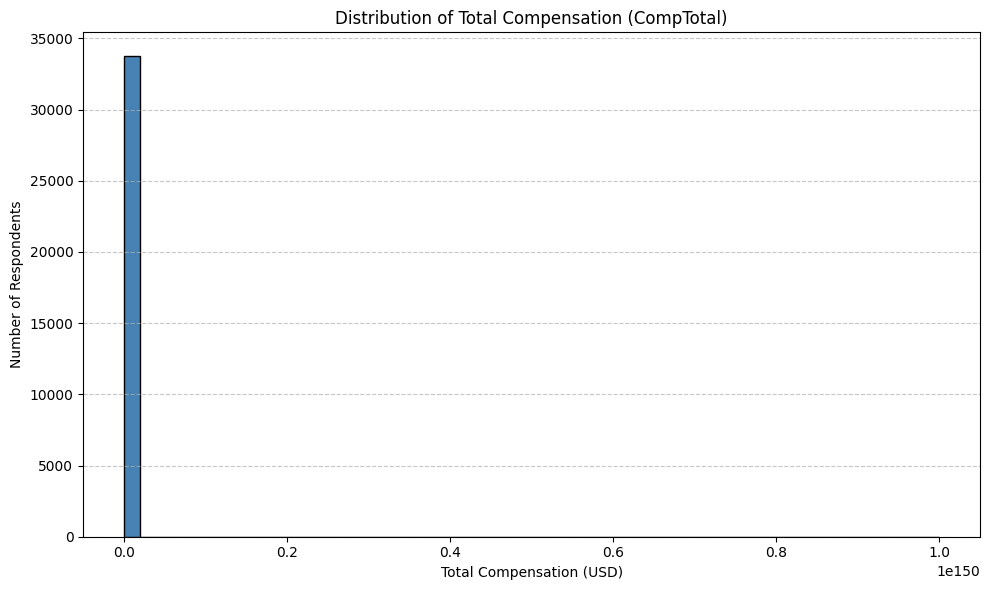

In [9]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query non-null CompTotal values
query = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
df_comptotal = pd.read_sql_query(query, conn)

# Step 3: Convert CompTotal to numeric (just to ensure)
df_comptotal['CompTotal'] = pd.to_numeric(df_comptotal['CompTotal'], errors='coerce')

# Step 4: Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_comptotal['CompTotal'], bins=50, color='steelblue', edgecolor='black')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


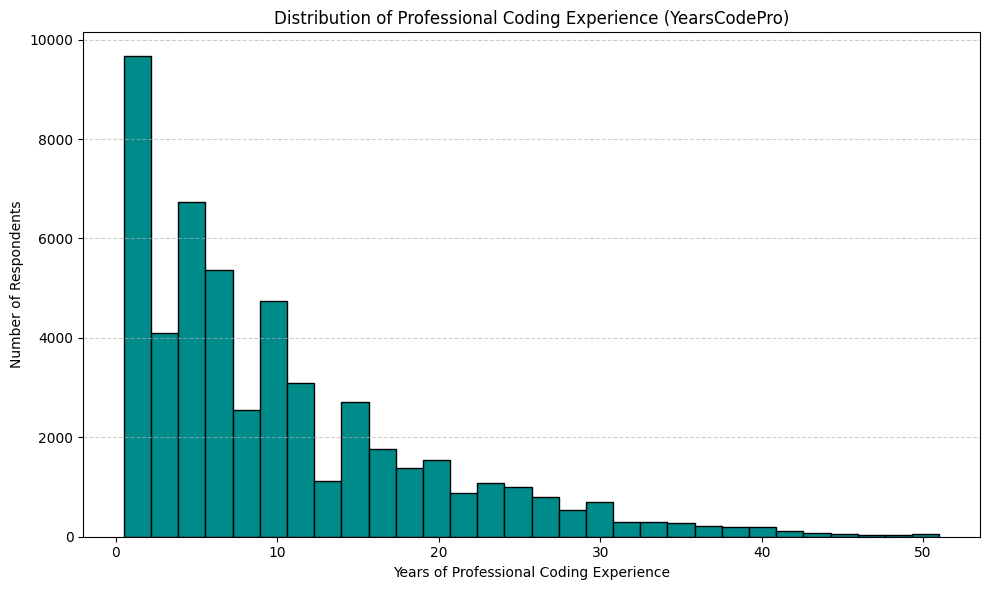

In [10]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query non-null YearsCodePro values
query = """
SELECT YearsCodePro
FROM main
WHERE YearsCodePro IS NOT NULL
"""
df_years = pd.read_sql_query(query, conn)

# Step 3: Convert text like 'Less than 1 year' and 'More than 50 years' to numeric
def convert_years(value):
    if isinstance(value, str):
        if 'Less than 1 year' in value:
            return 0.5
        elif 'More than 50 years' in value:
            return 51
        else:
            try:
                return float(value)
            except:
                return None
    return value

df_years['YearsCodePro'] = df_years['YearsCodePro'].apply(convert_years)

# Drop missing/invalid values
df_years.dropna(inplace=True)

# Step 4: Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_years['YearsCodePro'], bins=30, color='darkcyan', edgecolor='black')
plt.title('Distribution of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


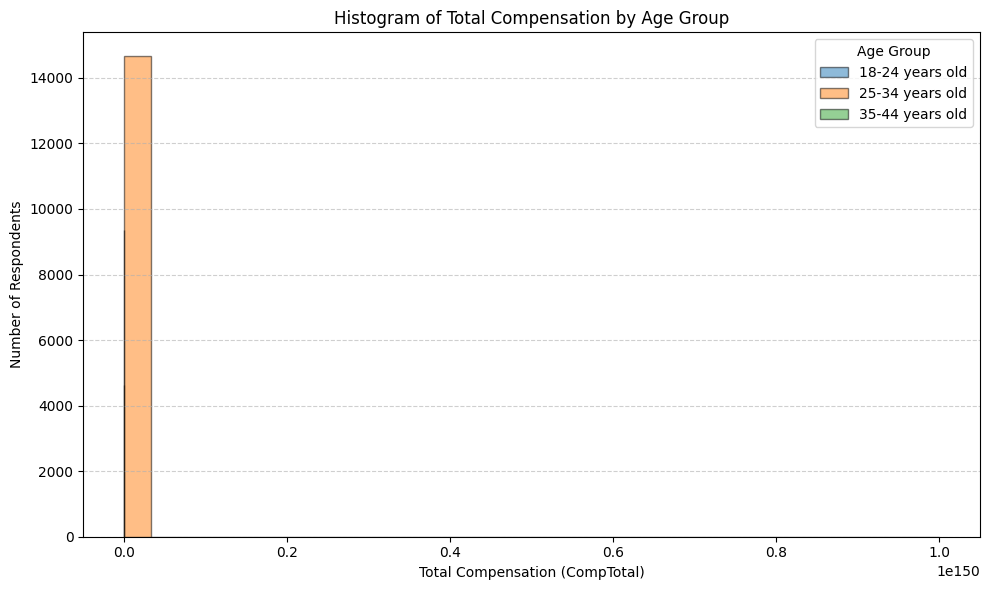

In [11]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Load Age and CompTotal columns with non-null values
query = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL AND CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Convert CompTotal to numeric and drop invalids
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])

# Step 4: Select age groups to compare
selected_ages = ['18-24 years old', '25-34 years old', '35-44 years old']

# Step 5: Plot histograms for each age group
plt.figure(figsize=(10, 6))

for age_group in selected_ages:
    subset = df[df['Age'] == age_group]['CompTotal']
    plt.hist(subset, bins=30, alpha=0.5, label=age_group, edgecolor='black')

plt.title('Histogram of Total Compensation by Age Group')
plt.xlabel('Total Compensation (CompTotal)')
plt.ylabel('Number of Respondents')
plt.legend(title='Age Group')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


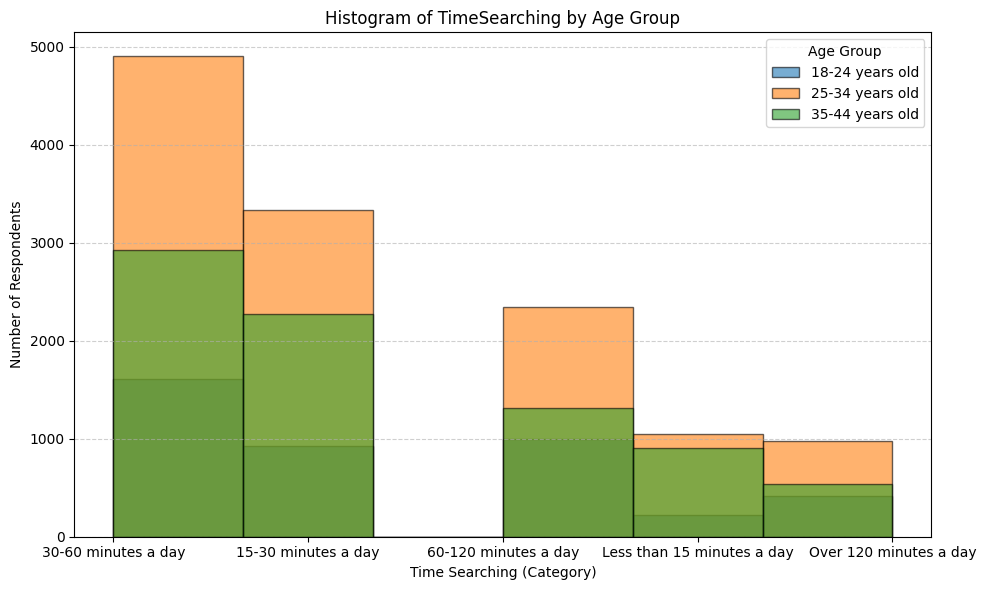

In [12]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query relevant columns with non-null values
query = """
SELECT Age, TimeSearching
FROM main
WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Filter for selected Age groups
selected_ages = ['18-24 years old', '25-34 years old', '35-44 years old']
df = df[df['Age'].isin(selected_ages)]

# Step 4: Plot histogram
plt.figure(figsize=(10, 6))

for age_group in selected_ages:
    subset = df[df['Age'] == age_group]['TimeSearching']
    plt.hist(subset, bins=6, alpha=0.6, label=age_group, edgecolor='black')

plt.title('Histogram of TimeSearching by Age Group')
plt.xlabel('Time Searching (Category)')
plt.ylabel('Number of Respondents')
plt.legend(title='Age Group')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


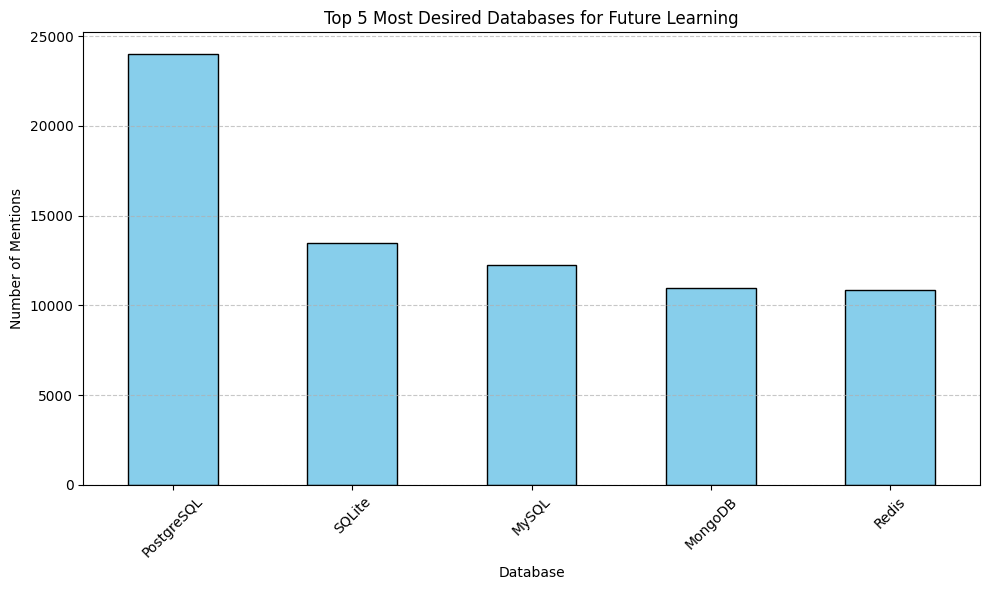

In [13]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query the DatabaseWantToWorkWith column
query = """
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Split multi-value entries and count frequencies
all_databases = df['DatabaseWantToWorkWith'].str.split(';').explode()
top_5 = all_databases.value_counts().head(5)

# Step 4: Plot a bar chart (histogram)
plt.figure(figsize=(10, 6))
top_5.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top 5 Most Desired Databases for Future Learning")
plt.xlabel("Database")
plt.ylabel("Number of Mentions")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


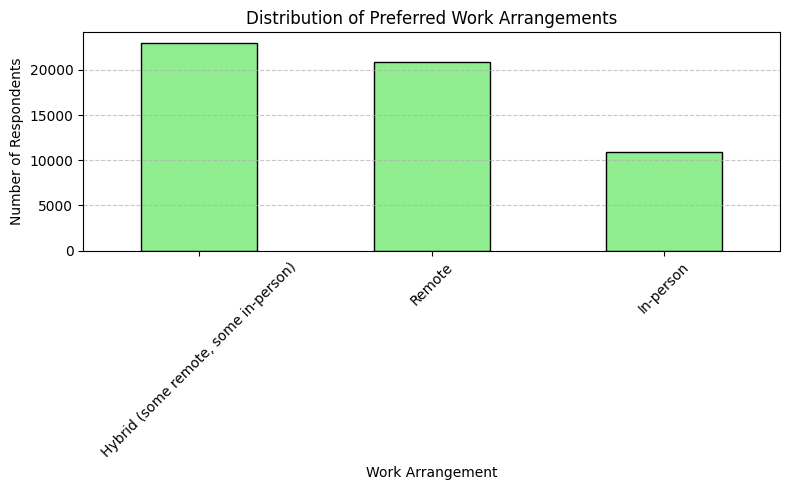

In [14]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query the RemoteWork column
query = """
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Count occurrences of each RemoteWork type
work_pref_counts = df['RemoteWork'].value_counts()

# Step 4: Plot a bar chart (histogram)
plt.figure(figsize=(8, 5))
work_pref_counts.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title("Distribution of Preferred Work Arrangements")
plt.xlabel("Work Arrangement")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


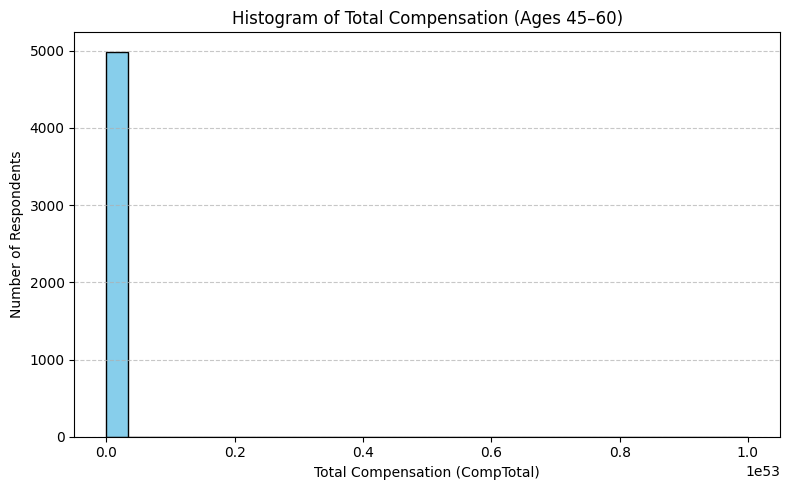

In [15]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Query required columns and filter for age 45–60
query = """
SELECT Age, CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Filter Age group 45–60
age_filter = df['Age'].isin(['45-54 years old', '55-64 years old', '65 years or older'])
df_filtered = df[age_filter].copy()

# Step 4: Convert CompTotal to numeric (if needed)
df_filtered['CompTotal'] = pd.to_numeric(df_filtered['CompTotal'], errors='coerce')
df_filtered = df_filtered.dropna(subset=['CompTotal'])

# Step 5: Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df_filtered['CompTotal'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Compensation (Ages 45–60)')
plt.xlabel('Total Compensation (CompTotal)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


/tmp/ipykernel_1729/1422408347.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('ExperienceBin')['JobSat'].mean().plot(kind='bar', color='teal', edgecolor='black')


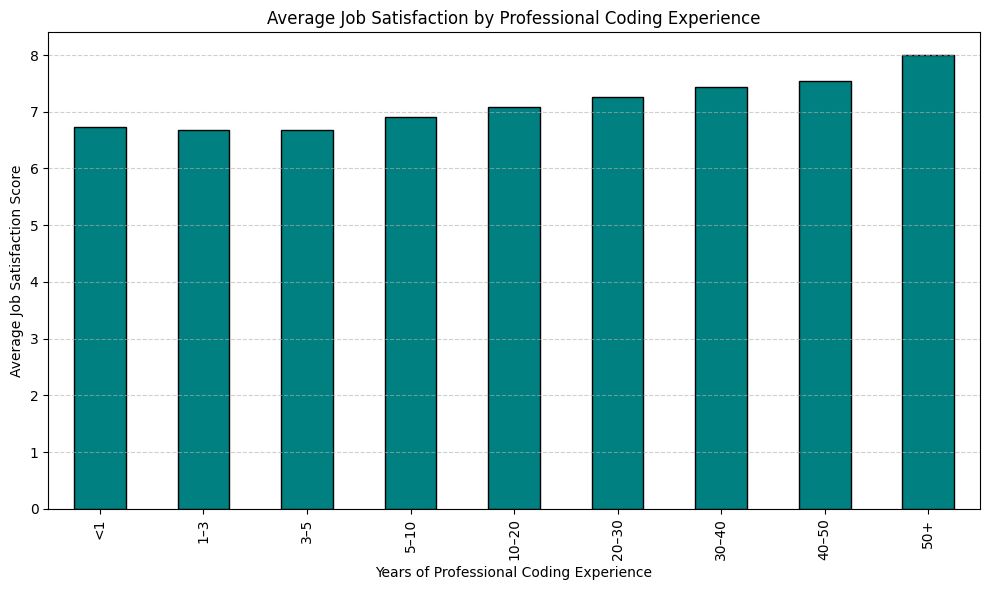

In [16]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database
conn = sqlite3.connect("survey-data.sqlite")

# Step 2: Load relevant data
query = """
SELECT YearsCodePro, JobSat
FROM main
WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Convert YearsCodePro to numeric values (replace text ranges with estimates)
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Step 4: Drop any remaining NaN
df.dropna(subset=['YearsCodePro', 'JobSat'], inplace=True)

# Step 5: Bin years of experience for histogram (optional)
bins = [0, 1, 3, 5, 10, 20, 30, 40, 50, 60]
labels = ['<1', '1–3', '3–5', '5–10', '10–20', '20–30', '30–40', '40–50', '50+']
df['ExperienceBin'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Step 6: Plot histogram
plt.figure(figsize=(10, 6))
df.groupby('ExperienceBin')['JobSat'].mean().plot(kind='bar', color='teal', edgecolor='black')
plt.title('Average Job Satisfaction by Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Average Job Satisfaction Score')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [17]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
